In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

In [3]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
id                         2535 non-null int64
name                       2535 non-null object
date                       2535 non-null object
manner_of_death            2535 non-null object
armed                      2526 non-null object
age                        2458 non-null float64
gender                     2535 non-null object
race                       2340 non-null object
city                       2535 non-null object
state                      2535 non-null object
signs_of_mental_illness    2535 non-null bool
threat_level               2535 non-null object
flee                       2470 non-null object
body_camera                2535 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 242.7+ KB


In [15]:
# Check missing values
df.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [43]:
# Since we're not going to build ML model for this project, we can leave null values alone for now and drop
# only columns that we need for a specific reason
df.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Text(0.5,1,'Killed by Race')

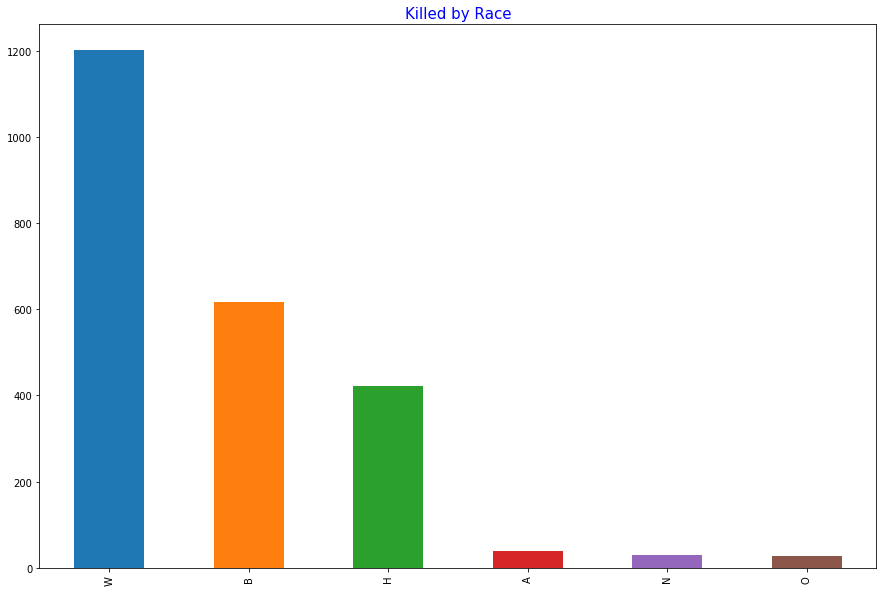

In [46]:
plt.figure(figsize=(15, 10))
df.race.value_counts().plot(kind='bar')
plt.title("Killed by Race",color = 'blue',fontsize=15)

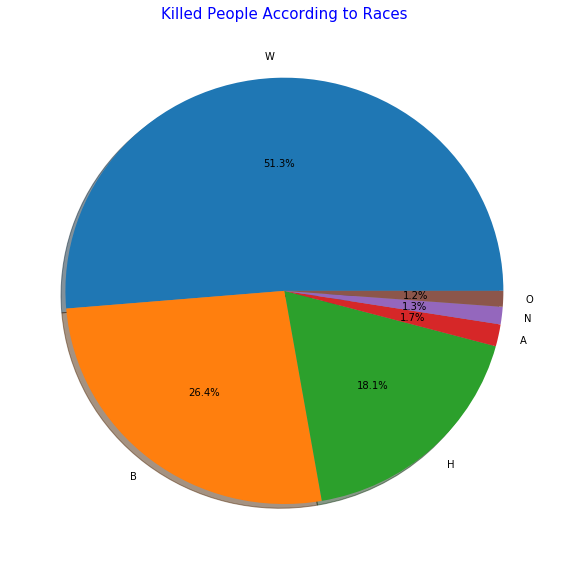

In [76]:
# Race rates according in kill data 
labels = df.race.value_counts().index
explode = [0,0,0,0,0,0]
sizes = df.race.value_counts().values
# visual
plt.figure(figsize = (8,8))
plt.pie(sizes, explode=explode, labels=labels, shadow=True, autopct='%1.1f%%')
plt.title('Killed People According to Races',color = 'blue',fontsize = 15)
plt.tight_layout()

In [47]:
# We can see from above that police shoot and kill more W, B, and H than other races. 
df.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

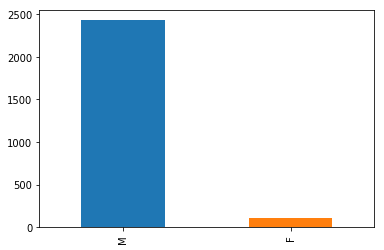

In [41]:
df.gender.value_counts().plot(kind='bar')

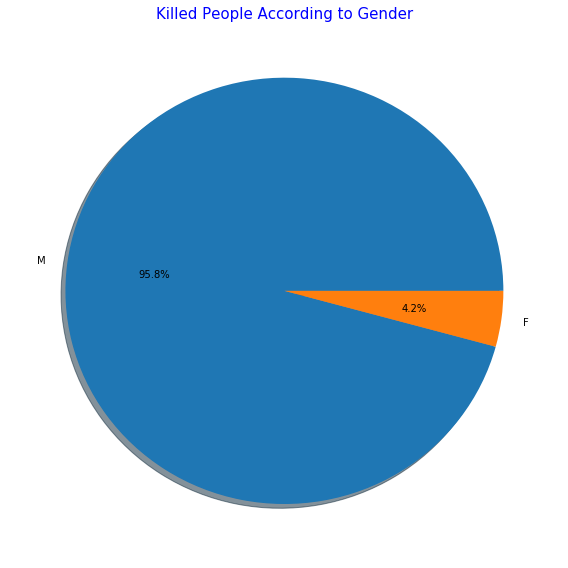

In [78]:
# Gender rates according in kill data 
labels = df.gender.value_counts().index
explode = [0,0]
sizes = df.gender.value_counts().values
# visual
plt.figure(figsize = (8,8))
plt.pie(sizes, explode=explode, labels=labels, shadow=True, autopct='%1.1f%%')
plt.title('Killed People According to Gender',color = 'blue',fontsize = 15)
plt.tight_layout()

In [93]:
# we can observe that female only acquires 4.2% compare to male which is 95.8%

In [81]:
# let check manner of death and visualize it with gender using box plot
df.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

In [86]:
df.manner_of_death.value_counts()

shot                2363
shot and Tasered     172
Name: manner_of_death, dtype: int64

Text(0.5,1,'Manner of Death')

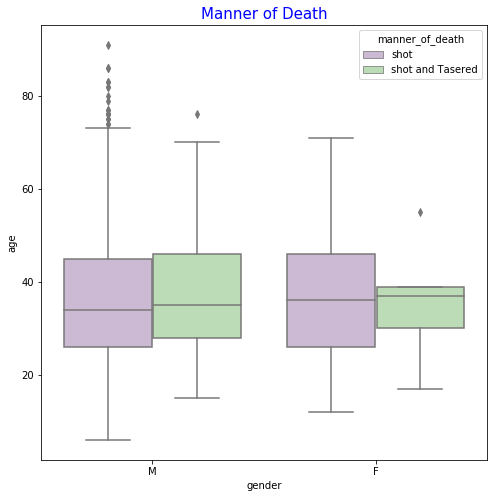

In [87]:
plt.figure(figsize = (8,8))
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=df, palette="PRGn")
plt.title('Manner of Death',color = 'blue',fontsize = 15)

In [98]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [99]:
df.armed.value_counts().head(20)

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
machete             18
unknown weapon      18
Taser                9
ax                   9
sword                8
baseball bat         8
metal pipe           7
box cutter           7
hammer               7
hatchet              6
crossbow             6
screwdriver          5
gun and knife        5
blunt object         5
Name: armed, dtype: int64

Text(0.5,1,'Kill weapon')

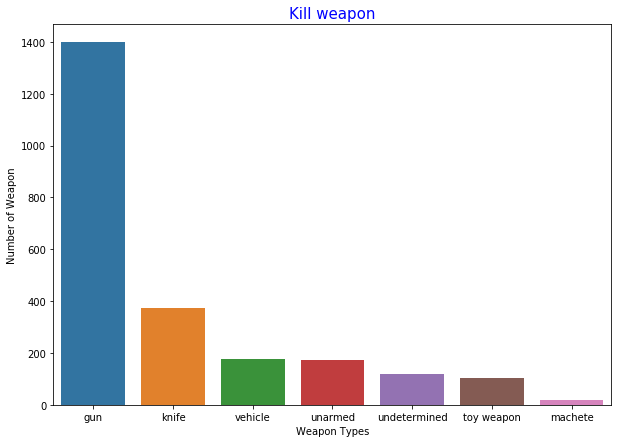

In [100]:
# we will use the top 7 weapons to graph between number of weapon vs weapon type
armed = df.armed.value_counts()
#print(armed)
plt.figure(figsize=(10,7))
sns.barplot(x=armed[:7].index,y=armed[:7].values)
plt.ylabel('Number of Weapon')
plt.xlabel('Weapon Types')
plt.title('Kill weapon',color = 'blue',fontsize=15)

In [101]:
# We can see gun has the highest amount followed by knife

In [103]:
len(df.age.value_counts())

73

In [115]:
df.age.value_counts().head()

25.0    103
36.0     91
31.0     85
29.0     83
24.0     83
Name: age, dtype: int64

In [107]:
#Since age columns has 73 value counts and it is hard for us to use countplot with 73 values.
# let create a column to determine whether a person is above 21 and below 21
df['age_group'] = df.age.apply(lambda x: 'above21' if x >= 21 else 'below 21')

In [111]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_group
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above21
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above21
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,above21
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above21
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above21


Text(0.5,1,'Age of killed people')

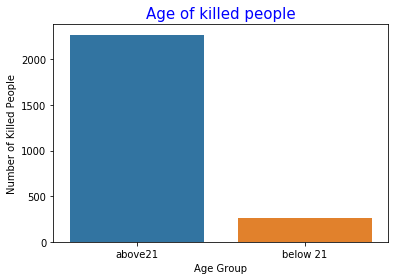

In [113]:
sns.countplot(x=df.age_group)
plt.xlabel('Age Group')
plt.ylabel('Number of Killed People')
plt.title('Age of killed people',color = 'blue',fontsize=15)

In [116]:
# Clearly most killed people are above 21 years old

Text(0,0.5,'Deaths')

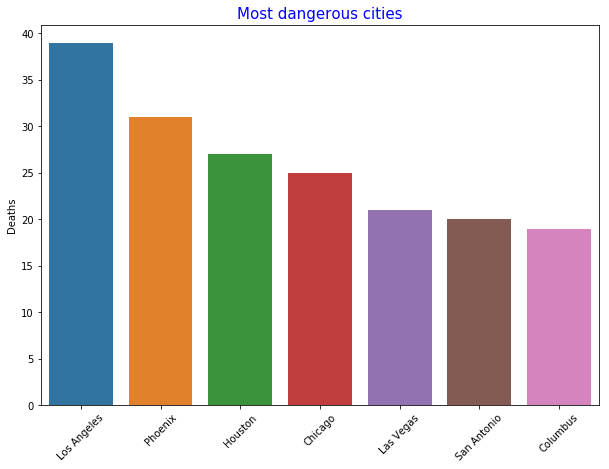

In [120]:
# Let move on to check 7 most dangerous cities
# Most dangerous cities
city = df.city.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=city[:7].index,y=city[:7].values)
plt.xticks(rotation=45)
plt.title('Most dangerous cities',color = 'blue',fontsize=15)
plt.ylabel('Deaths')

Text(0.5,1,'Most dangerous state')

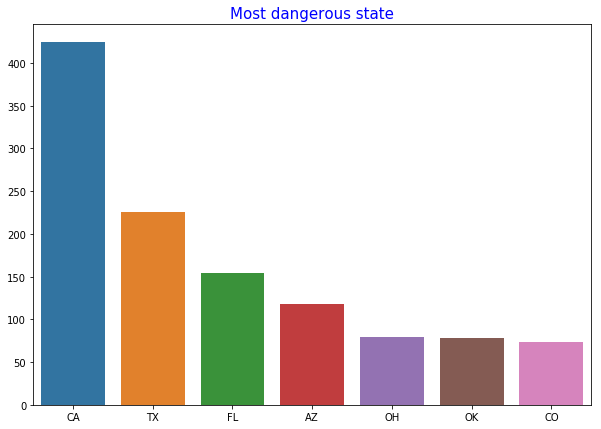

In [122]:
# Let do the same for most dangerous state

# most dangerous states
state = df.state.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=state[:7].index,y=state[:7].values)
plt.title('Most dangerous state',color = 'blue',fontsize=15)

Text(0.5,1,'Threat types')

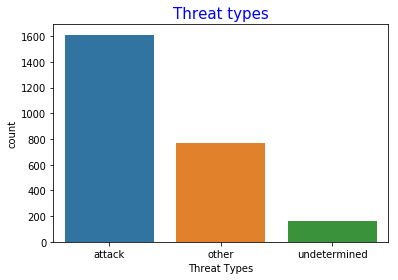

In [123]:
# Threat types
sns.countplot(df.threat_level)
plt.xlabel('Threat Types')
plt.title('Threat types',color = 'blue', fontsize = 15)

Text(0.5,1,'Having Mental Illness')

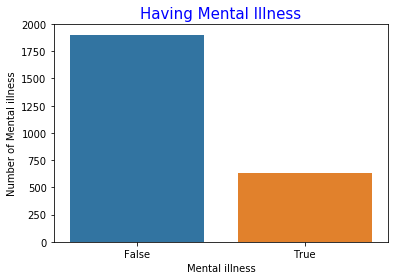

In [130]:
# Having mental ilness or not for killed people
sns.countplot(df.signs_of_mental_illness)
plt.xlabel('Mental illness')
plt.ylabel('Number of Mental illness')
plt.title('Having Mental Illness',color = 'blue', fontsize = 15)

Text(0.5,1,'Having Body Cameras on Police')

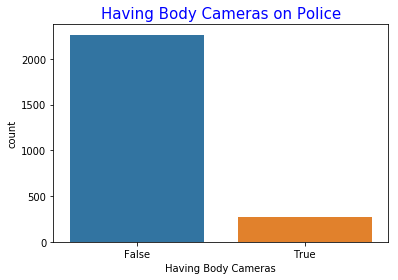

In [129]:
# Having body cameras or not for police
sns.countplot(df.body_camera)
plt.xlabel('Having Body Cameras')
plt.title('Having Body Cameras on Police',color = 'blue',fontsize = 15)